In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.family'] = 'AppleGothic'

In [10]:
reviews = pd.read_csv('/content/drive/MyDrive/archive/coupang_reviews.csv', encoding='utf-8', sep='\t')
reviews

,rating,headline,review_content
0,5,만족합니다,가성비도 좋아요 재구매 의사있어요
1,5,가성비 싸게샀어요 이뻐요 ㅎㅎ,등록된 리뷰내용이 없습니다
2,4,가성비 완전 대박!,가방이랑 볼이 정품이라 만족스럽습니다 다른 제품들은 잘살펴보면 정품이 아닌경우들이 ...
3,4,골린이에게 적당한 골프채^^,"골프채 드라이버 및 쿼터, 우드 아이언포함하여 10개 잘 받았습니다. 하자는 없어요..."
4,5,저처럼 골프 입문하신지 얼마 되지 않으신 분들 강추!,스크린으로 처음 골프 입문한 골린이입니다. 하우스 채로 만 치다 보니 내채가 필요하...
...,...,...,...
1599568,5,신경과 근육 기능 유지를위해 꾸준히 먹어요.,등록된 리뷰내용이 없습니다
1599569,5,마그네슘 함량이 많아서 좋습니다,등록된 리뷰내용이 없습니다
1599570,5,재 구매했어요,등록된 리뷰내용이 없습니다
1599571,5,다른건 모르겠고 수면의 질은 완전 좋아졌습니다,깊은 잠을 못자서 항상 피곤하고 졸렸는데마그네슘 먹고나서 진짜 효과 바로 느끼고 있...


In [11]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599573 entries, 0 to 1599572
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   rating          1599571 non-null  object
 1   headline        1598844 non-null  object
 2   review_content  1590878 non-null  object
dtypes: object(3)
memory usage: 36.6+ MB


In [12]:
reviews['rating'].value_counts()

5                                 1243650
4                                  192704
3                                   74603
1                                   51371
2                                   29328
                                   ...   
중1  175                                 1
최고였습니다                                  1
리뷰믿고 시켰는데 주문 잘한거같아요. 단 잡내가 있어요          1
운이 안좋아 요번 고기는 별로네요                      1
5? 6? 재구매중이에요                           1
Name: rating, Length: 2464, dtype: int64

In [13]:
reviews[reviews['rating'] == '4']

,rating,headline,review_content
2,4,가성비 완전 대박!,가방이랑 볼이 정품이라 만족스럽습니다 다른 제품들은 잘살펴보면 정품이 아닌경우들이 ...
3,4,골린이에게 적당한 골프채^^,"골프채 드라이버 및 쿼터, 우드 아이언포함하여 10개 잘 받았습니다. 하자는 없어요..."
16,4,초보 골프 입문용으로 구매 했어요,이젠 하우스체에서 벗어나겠네요내일 한번 휘둘러 봐야겠네요주문한지 딱 10일만에 ...
21,4,저렴하게 잘 구매했습니다.,상품 잘 받았습니다. 생각보다 빨리 받을 수 있어 좋았습니다.초보자용으로 가성비 좋...
36,4,그립감이좋음,등록된 리뷰내용이 없습니다
...,...,...,...
1599548,4,등록된 헤드라인이 없습니다,눈 떨려서 샀는데 효과 있었으면 좋겠네요.배송 빨라요.
1599550,4,등록된 헤드라인이 없습니다,그닥 모르겠네요
1599557,4,잘 먹고 있어요^^,등록된 리뷰내용이 없습니다
1599563,4,잘 챙겨먹는데 효과는 모르겠음,등록된 리뷰내용이 없습니다


In [14]:
len(reviews[~reviews['rating'].isin(['1', '2', '3', '4', '5'])])

7917

In [15]:
# 평점이 1, 2, 3, 4, 5가 아닌 것들을 제거
reviews = reviews[reviews['rating'].isin(['1', '2', '3', '4', '5'])]
reviews['rating'] = reviews['rating'].astype('int')

In [16]:
# headline, review_content 모두 결측치 있는 row 제거
reviews = reviews[reviews[['headline','review_content']].isnull().sum(axis=1) == 0]

In [17]:
# headline, review_content 모두 내용이 없는 row
reviews[reviews['headline'].str.contains('등록된 헤드라인이') & reviews['review_content'].str.contains('등록된 리뷰내용이')]

,rating,headline,review_content


In [18]:
reviews['rating'].value_counts().sort_index(ascending=False)

5    1242808
4     192548
3      74551
2      29309
1      51292
Name: rating, dtype: int64

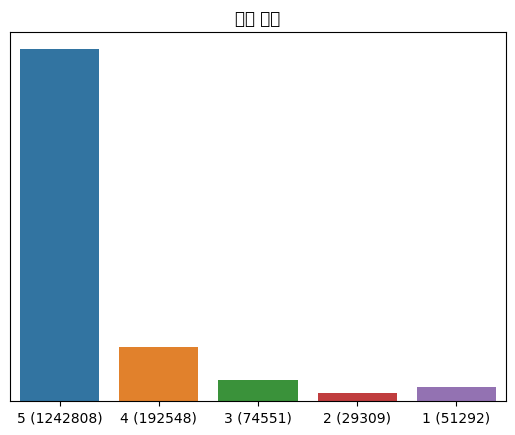

In [19]:
# 평점 분포 확인

x = [f"{rating} ({count})" for rating, count in reviews['rating'].value_counts().sort_index(ascending=False).items()]

sns.barplot(x=x, y=reviews['rating'].value_counts().sort_index(ascending=False).values)
# y축에 표시 없애기
plt.title('평점 분포')
plt.yticks([])
plt.show()


In [20]:
# '등록된 헤드라인이 없습니다' 포함한 headline 빈 문자열로 변경
# '등록된 리뷰내용이 없습니다' 포함한 review_content 빈 문자열로 변경
reviews['headline'] = np.where(reviews['headline'].str.contains('등록된 헤드라인이'), '', reviews['headline'])
reviews['review_content'] = np.where(reviews['review_content'].str.contains('등록된 리뷰내용이'), '', reviews['review_content'])

In [21]:
# headline, review_content 공백을 기준으로 합치기
reviews['content'] = reviews['headline'] + " " + reviews['review_content']
reviews = reviews[['rating', 'content']].reset_index(drop=True)

In [22]:
# 중복된 리뷰 제거
print(reviews.duplicated(subset=['rating', 'content']).sum())
print(len(reviews))
reviews.drop_duplicates(subset=['rating', 'content'], keep='first', inplace=True)
print(len(reviews))

779873
1590508
810635


In [23]:
!pip install konlpy
from konlpy.tag import Komoran, Okt, Kkma
import re

kkma = Kkma()
komoran = Komoran()
okt = Okt()

# 한글과 공백을 제외하고 모두 제거
def apply_regular_expression(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')
    result = hangul.sub('', text)
    return result

In [24]:
s = apply_regular_expression(reviews.iloc[63]['content'])
print(s)

# morphs : 형태소 추출
# nouns : 명사 추출

# kkma -> 속도 너무 느림
# komoran -> 속도 빠름, 하지만 명사를 너무 잘게 나눔 (ex. 배송 -> 배,송)
# okt -> 속도 빠름, 명사 추출에 좋은 성능을 보임

# 형태소 없이 명사만 추출해도 의미를 파악하는데 충분하다고 판단
# print(kkma.morphs(s))
# print(kkma.nouns(s))
# print()
# print(komoran.morphs(s))
# print(komoran.nouns(s))
# print()
# print(okt.morphs(s))
# print(okt.nouns(s))

총알배송 진짜네요 급하게 쓸 채가 필요해서 쿠팡 둘러보다 지브이 골프채를 발견했어요    와이골프 판매자로 검색하니 다른곳에가격대가 조금 더 높은것들도 있던데  이게 더 신형 같아서    년형 뉴그레이트 빅토리 ㅡ샀습니다 지브이투어는 처음 둘어본 골프채에요 어제 스크린 갔더니 번은  나오고  번은  정도 나오네요  어 생각보다 가볍게 잘  맞아요ㅡ저는 골프 안친지 오래된 대 아줌마인데요다시 레슨 끊게 되어ㅡ급히 구매하였고 미즈노하고 가격차이가 별로없어 살짝 고민했어요중고가격 안나올텐데 우짤꼬 반품할까 하루는 고민했어요 근데 꺼내보니 오 드라이버도 너무너무 예쁘고  전에 쓰던 다이와하고 비교해서이게 그립이 뚜꺼워서 잡기 편하고 헐겁지않아 좋은거 같야요채가 단단한 느낌에 무게는 적당히 가볍고요망설임에 도움되실까 열심히 적어봅니다ㅎㅎ번창하세요


In [25]:
# 한글자로 된 단어는 의미가 없으므로 제거
print([word for word in okt.nouns(s) if len(word) > 1])

['총알', '배송', '진짜', '쿠팡', '브이', '골프채', '발견', '골프', '판매', '자로', '검색', '가격', '조금', '신형', '그레이', '빅토리', '브이', '투어', '처음', '골프채', '어제', '스크린', '번은', '번은', '정도', '생각', '골프', '아줌마', '다시', '레슨', '구매', '미즈노', '가격', '차이', '별로', '살짝', '고민', '중고', '가격', '우짤꼬', '반품', '하루', '고민', '드라이버', '비교', '잡기', '느낌', '무게', '도움', '번창']


In [26]:
# 빈도 분석
from collections import Counter

counter = Counter([word for word in okt.nouns(s) if len(word) > 1])

counter

Counter({'총알': 1,
         '배송': 1,
         '진짜': 1,
         '쿠팡': 1,
         '브이': 2,
         '골프채': 2,
         '발견': 1,
         '골프': 2,
         '판매': 1,
         '자로': 1,
         '검색': 1,
         '가격': 3,
         '조금': 1,
         '신형': 1,
         '그레이': 1,
         '빅토리': 1,
         '투어': 1,
         '처음': 1,
         '어제': 1,
         '스크린': 1,
         '번은': 2,
         '정도': 1,
         '생각': 1,
         '아줌마': 1,
         '다시': 1,
         '레슨': 1,
         '구매': 1,
         '미즈노': 1,
         '차이': 1,
         '별로': 1,
         '살짝': 1,
         '고민': 2,
         '중고': 1,
         '우짤꼬': 1,
         '반품': 1,
         '하루': 1,
         '드라이버': 1,
         '비교': 1,
         '잡기': 1,
         '느낌': 1,
         '무게': 1,
         '도움': 1,
         '번창': 1})

In [27]:
# 불용어 제거
stopwords = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt").values.tolist()
print(len(stopwords))
print(stopwords[:10])

# 리뷰 데이터에 많이 포함된 불용어 추가
stopwords.extend(['쿠팡', '리뷰'])


674
[['휴'], ['아이구'], ['아이쿠'], ['아이고'], ['어'], ['나'], ['우리'], ['저희'], ['따라'], ['의해']]


In [28]:
from sklearn.model_selection import train_test_split

def split_rating(rating):
    if rating == 5:
        return 1
    if rating in [1,2,3]:
        return 0
    return -1

reviews['sentiment'] = reviews['rating'].apply(split_rating)
print(reviews['sentiment'].value_counts())

reviews_sample_positive = reviews[reviews['sentiment'] == 1].sample(15000, random_state=1353)
reviews_sample_negative = reviews[reviews['sentiment'] == 0].sample(15000, random_state=1353)
reviews_sample = pd.concat([reviews_sample_positive, reviews_sample_negative]).reset_index(drop=True)
print(reviews_sample['sentiment'].value_counts())
print(reviews_sample.shape)

train_x, temp_x, train_y, temp_y = train_test_split(reviews_sample['content'], reviews_sample['sentiment'], test_size=0.4, random_state=1353)
test_x, valid_x, test_y, valid_y = train_test_split(temp_x, temp_y, test_size=0.5, random_state=1353)

del temp_x, temp_y

print(train_x.shape, train_y.shape)
print(valid_x.shape, valid_y.shape)
print(test_x.shape, test_y.shape)

print(train_y.value_counts())
print(valid_y.value_counts())
print(test_y.value_counts())



 1    610664
-1    105659
 0     94312
Name: sentiment, dtype: int64
1    15000
0    15000
Name: sentiment, dtype: int64
(30000, 3)
(18000,) (18000,)
(6000,) (6000,)
(6000,) (6000,)
0    9026
1    8974
Name: sentiment, dtype: int64
1    3030
0    2970
Name: sentiment, dtype: int64
0    3004
1    2996
Name: sentiment, dtype: int64


In [29]:
from sklearn.feature_extraction.text import CountVectorizer

def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')
    result = hangul.sub('', text)
    result = [word for word in okt.nouns(result) if len(word) > 1]
    result = [word for word in result if not word in stopwords]
    return result

cv = CountVectorizer(tokenizer = lambda x: text_cleaning(x))
cv.fit(train_x)
x_train_cv = cv.transform(train_x)
x_valid_cv = cv.transform(valid_x)
x_test_cv = cv.transform(test_x)

In [30]:
print(x_train_cv.toarray()) # 각 단어의 리뷰별 등장 횟수. row: 리뷰, column: 단어
print(x_train_cv.shape)
word_list = cv.get_feature_names_out() # 단어 리스트
count_list:np.ndarray = x_train_cv.toarray().sum(axis=0) # 각 단어의 빈도 리스트
print(len(word_list))
print(len(count_list))
print(word_list[count_list.argsort()[::-1]][:30]) # 빈도수가 높은 단어 30개
print(dict(zip(word_list, count_list))) # 단어별 빈도수 Dictonary

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(18000, 21231)
21231
21231
['구매' '제품' '사용' '가격' '생각' '정도' '배송' '그냥' '후기' '주문' '상품' '피부' '느낌' '사이즈'
 '구입' '하나' '냄새' '정말' '도움' '부분' '아이' '조금' '진짜' '추천' '한번' '다른' '머리' '아주'
 '처음' '포장']
{'가가': 16, '가감': 4, '가게': 63, '가격': 3918, '가격댜': 1, '가격텍': 1, '가겯': 1, '가경': 2, '가계': 1, '가공': 33, '가공품': 3, '가구': 124, '가구라': 5, '가구점': 7, '가글': 1, '가기': 58, '가까이': 63, '가끔': 344, '가나': 40, '가내': 2, '가년': 1, '가농': 25, '가늠': 10, '가능': 122, '가능도': 1, '가능성': 14, '가능풍량': 1, '가닐려구': 1, '가다가': 5, '가닥': 9, '가대': 1, '가데': 1, '가도': 14, '가독성': 2, '가동': 6, '가드': 46, '가득': 121, '가든': 1, '가듬': 1, '가디건': 45, '가뜩이나': 4, '가라': 22, '가라아게': 1, '가라지': 1, '가락': 7, '가랑비': 1, '가랑이': 11, '가래': 6, '가래떡': 23, '가량': 35, '가려움': 40, '가려움증': 11, '가려진': 1, '가렵': 14, '가렵거': 1, '가렵기': 3, '가렵네': 1, '가렵다': 3, '가렵다해': 1, '가렵지': 1, '가렵진않음': 1, '가령': 2, '가로': 55, '가로세로': 3, '가루': 370, '가루라': 3, '가루약': 2, '가루타': 2, '가르마': 10,

In [31]:
# TF-IDF
# TfidfVectorizer: 텍스트 데이터를 TF-IDF 행렬로 변환
# TfidfTransformer: 기존에 계산된 TF (Term Frequency) 행렬을 TF-IDF 행렬로 변환

from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit(x_train_cv)
x_train_tfidf = tfidf_transformer.transform(x_train_cv)
x_valid_tfidf = tfidf_transformer.transform(x_valid_cv)
x_test_tfidf = tfidf_transformer.transform(x_test_cv)

In [32]:
print(x_train_tfidf.shape,end='\n\n') # (리뷰 개수, 단어 종류 개수)
print('BOW에서 단어의 중요도(0이 아닌 것만 출력)')
print(x_train_cv[0],end='\n\n')
print('TF-IDF에서 단어의 중요도(0이 아닌 것만 출력)')
print(x_train_tfidf[0])


(18000, 21231)

BOW에서 단어의 중요도(0이 아닌 것만 출력)
  (0, 1780)	1
  (0, 6962)	1
  (0, 7672)	1
  (0, 8983)	1
  (0, 13465)	1
  (0, 15628)	1
  (0, 15731)	1
  (0, 20173)	1

TF-IDF에서 단어의 중요도(0이 아닌 것만 출력)
  (0, 20173)	0.43929266129230987
  (0, 15731)	0.3790267726039549
  (0, 15628)	0.2929073903410587
  (0, 13465)	0.34142304229579146
  (0, 8983)	0.43929266129230987
  (0, 7672)	0.43929266129230987
  (0, 6962)	0.2359497417318541
  (0, 1780)	0.13916847740540203


In [33]:
# 로지스틱 회귀

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression

params = {'C': [1], 'max_iter': [100]}
best_params = {}
best_score = 0

for C in params['C']:
    for max_iter in params['max_iter']:
        lr = LogisticRegression(C=C, max_iter=max_iter, random_state=1353)
        lr.fit(x_train_tfidf, train_y)
        pred_y = lr.predict(x_valid_tfidf)
        score = accuracy_score(valid_y, pred_y)

        print()
        print("=" * 30)
        print(">>>> accuracy-score: {}".format(accuracy_score(valid_y, pred_y)))
        print(">>>> precision-score: {}".format(precision_score(valid_y, pred_y)))
        print(">>>> recall-score: {}".format(recall_score(valid_y, pred_y)))
        print(">>>> f1-score: {}".format(f1_score(valid_y, pred_y)))
        print()
        print(">>>> Params: {}".format({ 'C': C, 'max_iter': max_iter}))
        print("=" * 30)
        print()

        if score > best_score:
            best_score = score
            best_params['C'] = C
            best_params['max_iter'] = max_iter
            print(">>>> Best Score Update: {}".format(best_score))
            print(">>>> Best Params Update: {}".format(best_params))




print("=" * 30)
print(">>>> Best Score: {}".format(best_score))
print(">>>> Best Params: {}".format(best_params))





>>>> accuracy-score: 0.787
>>>> precision-score: 0.7864617396991498
>>>> recall-score: 0.7937293729372937
>>>> f1-score: 0.7900788436268068

>>>> Params: {'C': 1, 'max_iter': 100}

>>>> Best Score Update: 0.787
>>>> Best Params Update: {'C': 1, 'max_iter': 100}
>>>> Best Score: 0.787
>>>> Best Params: {'C': 1, 'max_iter': 100}


In [34]:
# best_params
# test set으로 평가
from sklearn.metrics import confusion_matrix

lr = LogisticRegression(**best_params, random_state=1353)
lr.fit(x_train_tfidf, train_y)
pred_y = lr.predict(x_test_tfidf)
print(">>>> accuracy-score: {}".format(accuracy_score(test_y, pred_y)))
print(">>>> precision-score: {}".format(precision_score(test_y, pred_y)))
print(">>>> recall-score: {}".format(recall_score(test_y, pred_y)))
print(">>>> f1-score: {}".format(f1_score(test_y, pred_y)))

confusion_matrix(test_y, pred_y)

>>>> accuracy-score: 0.7856666666666666
>>>> precision-score: 0.7912125340599455
>>>> recall-score: 0.7753671562082777
>>>> f1-score: 0.7832097100472015


array([[2391,  613],
       [ 673, 2323]])

In [35]:
text = '내가 웬만하면 리뷰 안쓰려했는데 이건 좀 선넘은거 아닌가요? 진짜 열받네 ㄹㅇ'
text_cv = cv.transform([text])
text_tfidf = tfidf_transformer.transform(text_cv)
pred = lr.predict(text_tfidf)[0]
predict_proba = lr.predict_proba(text_tfidf)[0]
print(f"{round(predict_proba[0], 2)} 확률로 부정 리뷰입니다." if pred == 0 else f"{round(predict_proba[1], 2)} 확률로 긍정 리뷰입니다.")

0.8 확률로 부정 리뷰입니다.


In [36]:
!pip install seaborn matplotlib wordcloud


In [37]:

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

<class 'pandas.core.frame.DataFrame'>
Int64Index: 810635 entries, 0 to 1590506
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   rating     810635 non-null  int64 
 1   content    810635 non-null  object
 2   sentiment  810635 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 24.7+ MB
None


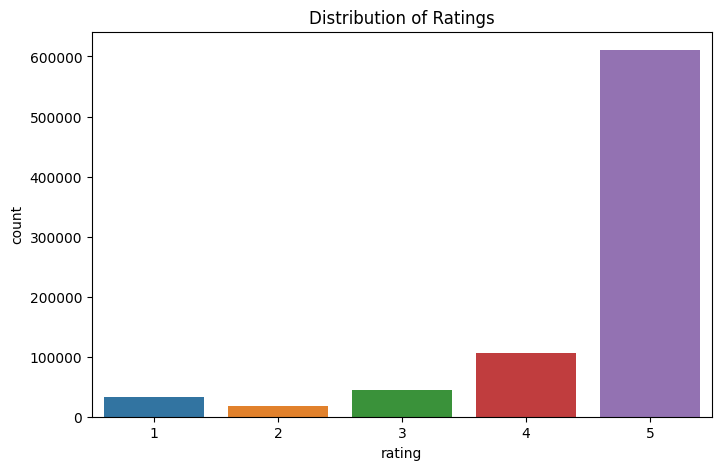

KeyboardInterrupt: ignored

<Figure size 1200x600 with 0 Axes>

In [38]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from wordcloud import WordCloud

mpl.rcParams['axes.unicode_minus'] = False


# Basic statistics of the DataFrame
print(reviews.info())

# Distribution of Ratings
plt.figure(figsize=(8, 5))
sns.countplot(x='rating', data=reviews)
plt.title('Distribution of Ratings')
plt.show()

# # Word Cloud for Positive and Negative Reviews
# positive_reviews = ' '.join(reviews[reviews['sentiment'] == 1]['content'])
# negative_reviews = ' '.join(reviews[reviews['sentiment'] == 0]['content'])

# # Word Cloud for Positive Reviews
# plt.figure(figsize=(12, 6))
# wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
# plt.imshow(wordcloud_positive, interpolation='bilinear')
# plt.axis('off')
# plt.title('Word Cloud for Positive Reviews')
# plt.show()

# # Word Cloud for Negative Reviews
# plt.figure(figsize=(12, 6))
# wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)
# plt.imshow(wordcloud_negative, interpolation='bilinear')
# plt.axis('off')
# plt.title('Word Cloud for Negative Reviews')
# plt.show()

# Histogram of Review Lengths
reviews['review_length'] = reviews['content'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(reviews['review_length'], bins=50, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Count')
plt.show()
